# Radar Simulation 1

## Basic Radar Formula Calculation

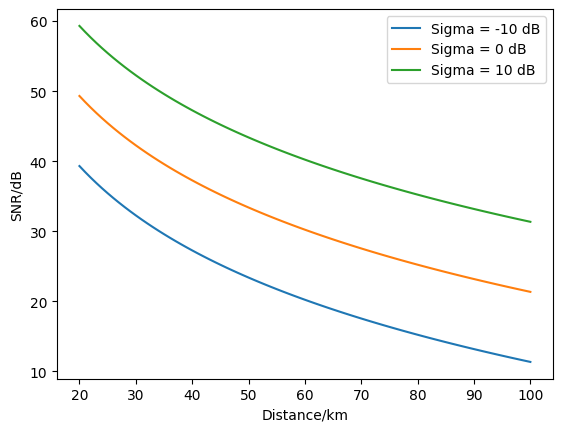

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the radar equation function
def radar_eq(pt, freq, G, sigma, b, NF, L, range_km):
    c = 3.0e+8  # Speed of light in m/s
    lamda = c / freq  # Wavelength
    t0 = 290  # Standard temperature in Kelvin
    num1 = 10 * np.log10(pt * 1.0e3 * lamda**2) + 2 * G + sigma
    num2 = 10 * np.log10((4.0 * np.pi)**3 * 1.38e-23 * t0 * b) + NF + L
    range_db = 40 * np.log10(range_km * 1000)
    snr = num1[:, np.newaxis] * np.ones(len(range_km)) - num2 - np.ones((len(sigma), 1)) * range_db
    return snr

# Define parameters
pt = 1500
freq = 5.6e+9
G = 45
sigma = np.array([-10, 0, 10])
b = 5.0e+6
NF = 3
L = 6
range_km = np.arange(20, 101, 1)

# Call the radar equation function
snr = radar_eq(pt, freq, G, sigma, b, NF, L, range_km)

# Plotting
plt.figure()
for i in range(len(sigma)):
    plt.plot(range_km, snr[i, :], label=f'Sigma = {sigma[i]} dB')
plt.ylabel('SNR/dB')
plt.xlabel('Distance/km')
plt.legend()
plt.show()

## Dual-base Radar Formula Calculation

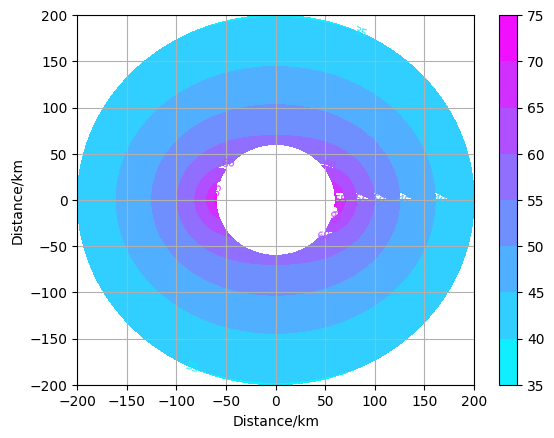

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def shuangjidi_req(pt, freq, G, sigma, Te, r0, NF, L, range_km):
    c = 3.0e+8  # Speed of light in m/s
    lamda = c / freq  # Wavelength
    sita = np.linspace(0, 2*np.pi, 361)  # Angle in radians
    r1, s1 = np.meshgrid(range_km, sita)
    num1 = 10 * np.log10(pt * 1.0e3 * Te * lamda**2 * sigma) + 2 * G
    num2 = 10 * np.log10((4.0 * np.pi)**3 * 1.38e-23 * 290) + NF + L
    Rt = (r1 * np.cos(s1) + r0/2)**2 + (r1 * np.sin(s1))**2
    Rr = (r1 * np.cos(s1) - r0/2)**2 + (r1 * np.sin(s1))**2
    range_db = 10 * np.log10(Rt * 1.0e6 * Rr * 1.0e6)
    snr = num1 - num2 - range_db
    return r1, s1, snr

# Define parameters
pt = 1500
freq = 5.6e+9
G = 45
sigma = 2
Te = 2e-4
r0 = 100
NF = 3
L = 8
range_km = np.arange(60, 200.5, 0.5)

# Call the function
r1, s1, snr = shuangjidi_req(pt, freq, G, sigma, Te, r0, NF, L, range_km)

# Plotting
plt.figure()
CS = plt.contourf(r1 * np.cos(s1), r1 * np.sin(s1), snr, 6, cmap='cool')
plt.colorbar(CS)
plt.clabel(CS, inline=True, fontsize=8)
plt.xlabel('Distance/km')
plt.ylabel('Distance/km')
plt.grid(True)
plt.show()

## Search Radar Formula

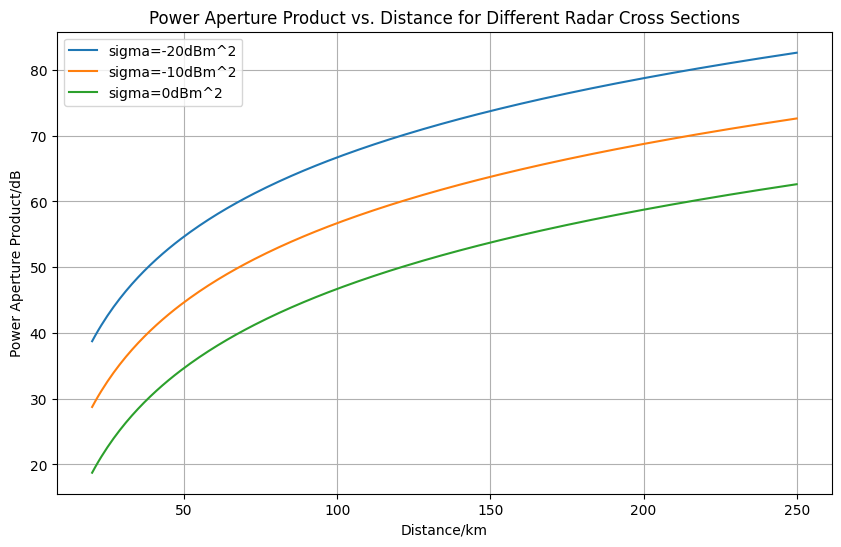

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def power_aperture(range_km, snr, sigma, tsc, az_angle, el_angle, NF, L):
    omega = az_angle * el_angle / (57.296**2)  # Convert angles to steradians
    num1 = snr + 10 * np.log10(4.0 * np.pi * 1.38e-23 * 290 * omega) + NF + L
    num2 = sigma + 10 * np.log10(tsc)
    PAP = num1 - num2[:, np.newaxis] + 40 * np.log10(range_km * 1000)
    return PAP

# Define parameters
range_km = np.arange(20, 251, 1)
snr = 20
sigma = np.array([-20, -10, 0])
tsc = 2
az_angle = 180
el_angle = 135
NF = 8
L = 6

# Call the function and plot
PAP = power_aperture(range_km, snr, sigma, tsc, az_angle, el_angle, NF, L)

plt.figure(figsize=(10, 6))
for i, sig in enumerate(sigma):
    plt.plot(range_km, PAP[i, :], label=f'sigma={sig}dBm^2')
plt.grid(True)
plt.xlabel('Distance/km')
plt.ylabel('Power Aperture Product/dB')
plt.legend()
plt.title('Power Aperture Product vs. Distance for Different Radar Cross Sections')
plt.show()

## Low-pulse Frequency Repeat Time (PRT) Radar Formula

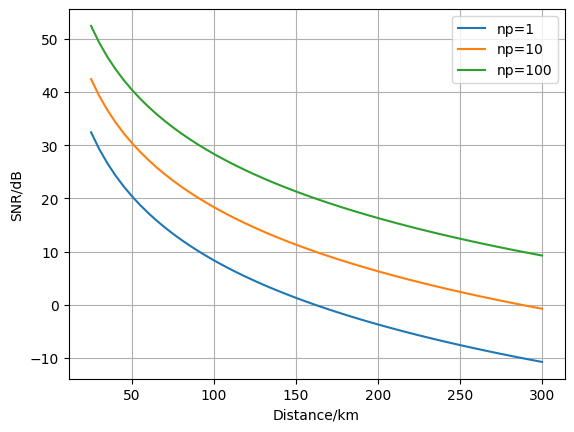

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def lprf_req(pt, freq, G, sigma, tao, NF, L, range_km, npulses):
    c = 3.0e+8
    lamda = c / freq
    num1 = 10 * np.log10(pt * 1.0e3 * tao * lamda**2 * sigma) + 2 * G
    num2 = 10 * np.log10((4.0 * np.pi)**3 * 1.38e-23 * 290) + NF + L
    range_db = 40 * np.log10(range_km * 1000.0)
    snr_out = num1 + 10 * np.log10(npulses[:, np.newaxis]) - num2 - range_db
    return snr_out

pt = 1.5
freq = 5.6e+9
G = 45
sigma = 0.1
tao = 0.0001
NF = 3
L = 6
range_km = np.arange(25, 301, 5)
np_values = np.array([1, 10, 100])

snr_out = lprf_req(pt, freq, G, sigma, tao, NF, L, range_km, np_values)

plt.figure()
for i, np_val in enumerate(np_values):
    plt.plot(range_km, snr_out[i, :], label=f'np={np_val}')
plt.xlabel('Distance/km')
plt.ylabel('SNR/dB')
plt.grid(True)
plt.legend()
plt.show()

## High-pulse Frequency Repeat Time (PRT) Radar Formula

C:\Users\24365\AppData\Local\Temp\ipykernel_106948\4033282184.py:8: RuntimeWarning: divide by zero encountered in log10
  num2 = 10 * np.log10((4.0 * np.pi)**3 * 1.38e-23 * 290 * (range_km * 1000)**4) + NF + L
C:\Users\24365\AppData\Local\Temp\ipykernel_106948\4033282184.py:8: RuntimeWarning: invalid value encountered in log10
  num2 = 10 * np.log10((4.0 * np.pi)**3 * 1.38e-23 * 290 * (range_km * 1000)**4) + NF + L


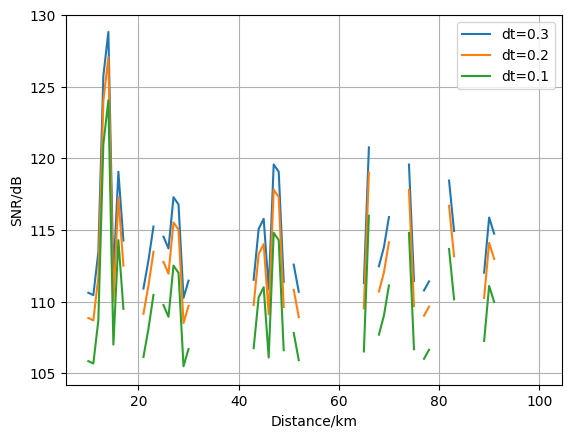

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def hprf_req(pt, freq, G, sigma, ti, range_km, NF, L, dt):
    c = 3.0e+8
    lamda = c / freq
    num1 = 10 * np.log10(pt * 1000.0 * lamda**2 * sigma * ti * np.array(dt)[:, np.newaxis]) + 2 * G
    num2 = 10 * np.log10((4.0 * np.pi)**3 * 1.38e-23 * 290 * (range_km * 1000)**4) + NF + L
    snr = num1 - num2
    return snr

pt = 100
freq = 5.6e+9
G = 20
sigma = 0.01
ti = 2
range_km = np.arange(10, 101, 1)
dt = [0.3, 0.2, 0.1]
NF = 4
L = 6

snr = hprf_req(pt, freq, G, sigma, ti, range_km, NF, L, dt)

plt.figure()
for i, dt_val in enumerate(dt):
    plt.plot(range_km, snr[i, :], label=f'dt={dt_val}')
plt.xlabel('Distance/km')
plt.ylabel('SNR/dB')
plt.grid(True)
plt.legend()
plt.show()

## Relationship Between Doppler Frequency and Velocity

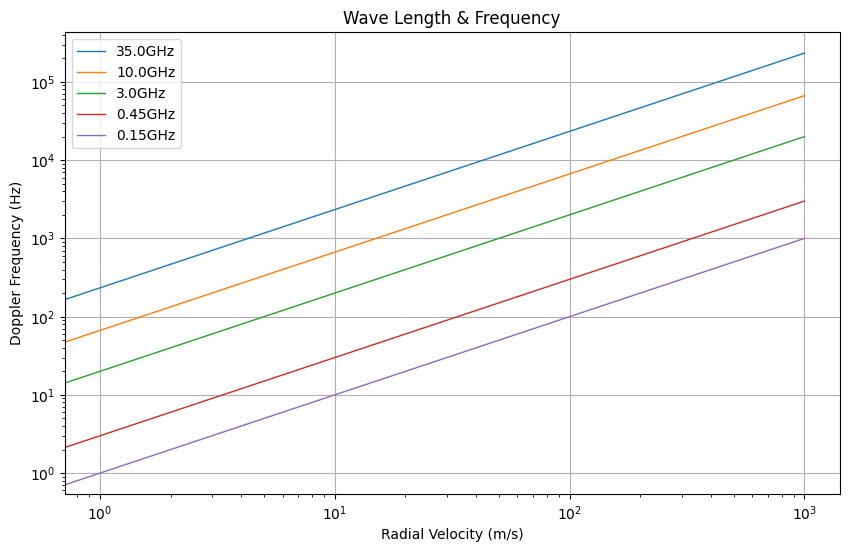

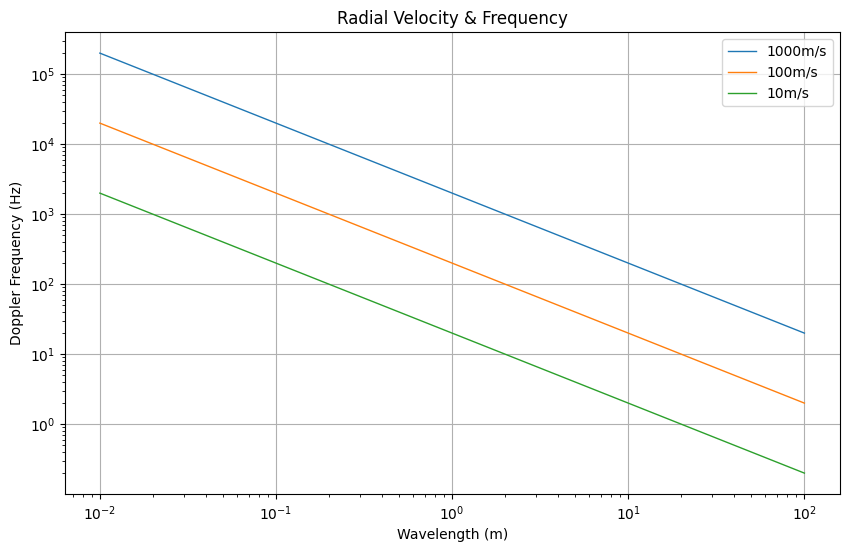

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency and velocity parameters
f = np.array([35e+9, 10e+9, 3e+9, 450e+6, 150e+6])
c = 3e+8
vr = np.arange(0, 1001)  # Radial velocity range

# Plot for Wave_Length & Frequency
plt.figure(figsize=(10, 6))
for f0 in f:
    fd = 2 * vr * f0 / c
    plt.loglog(vr, fd, linewidth=1, label=f'{f0/1e+9}GHz')
plt.xlabel('Radial Velocity (m/s)')
plt.ylabel('Doppler Frequency (Hz)')
plt.title('Wave Length & Frequency')
plt.legend()
plt.grid(True)

# Velocity and wavelength parameters
v = np.array([1000, 100, 10])
lambda_range = np.concatenate((np.arange(1e-2, 1, 0.01), np.arange(2, 101)))

# Plot for Radial_Velocity & Frequency
plt.figure(figsize=(10, 6))
for vr in v:
    fd = 2 * vr / lambda_range
    plt.loglog(lambda_range, fd, linewidth=1, label=f'{vr}m/s')
plt.xlabel('Wavelength (m)')
plt.ylabel('Doppler Frequency (Hz)')
plt.title('Radial Velocity & Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Relationship Between Radar Direct Look and Target Altitude

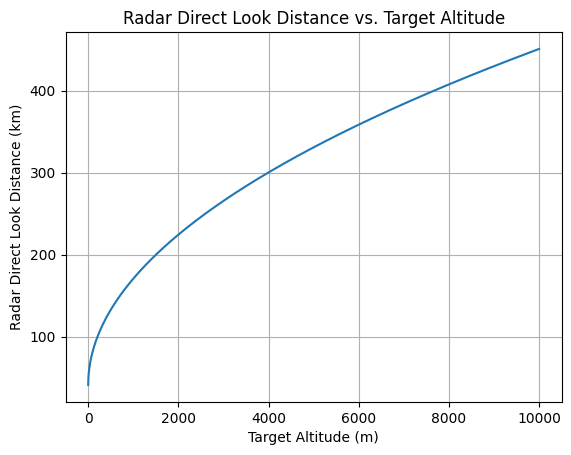

In [5]:
import numpy as np
import matplotlib.pyplot as plt

hr = 100
ht = np.arange(0, 1e4 + 1)
Rs = 4.1 * (np.sqrt(hr) + np.sqrt(ht))
plt.plot(ht, Rs)
plt.xlabel('Target Altitude (m)')
plt.ylabel('Radar Direct Look Distance (km)')
plt.title('Radar Direct Look Distance vs. Target Altitude')
plt.grid(True)
plt.show()